# Hyperparameter Tuning Project Setup

This notebook verifies the environment setup and demonstrates key concepts needed for the project.

## 1. Dependencies and Imports

In [18]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm

# Project-specific imports
import GPy
import GPyOpt

# Set random seed for reproducibility
np.random.seed(0)

# Configure matplotlib for notebook display
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Verify versions
print(f"NumPy version: {np.__version__}")
print(f"GPy version: {GPy.__version__}")
print(f"GPyOpt version: {GPyOpt.__version__}")

NumPy version: 1.26.4
GPy version: 1.13.2
GPyOpt version: 1.2.6


## 2. Environment Verification

In [19]:
def verify_numerical_computations():
    """Verify NumPy is working correctly with basic matrix operations"""
    try:
        # Test matrix operations
        A = np.array([[1, 2], [3, 4]])
        B = np.array([[5, 6], [7, 8]])
        
        # Basic operations
        np.dot(A, B)
        np.linalg.inv(A)
        
        print("✓ NumPy matrix operations working correctly")
        return True
    except Exception as e:
        print(f"✗ NumPy error: {e}")
        return False

def verify_gp_setup():
    """Verify GPy installation with a simple example"""
    try:
        # Generate some sample data
        X = np.linspace(0, 10, 50).reshape(-1, 1)
        Y = np.sin(X) + np.random.normal(0, 0.1, X.shape)
        
        # Create and train a simple GP model
        kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
        model = GPy.models.GPRegression(X, Y, kernel)
        
        print("✓ GPy setup working correctly")
        return True
    except Exception as e:
        print(f"✗ GPy error: {e}")
        return False

def verify_gpyopt_setup():
    """Verify GPyOpt installation with a simple optimization"""
    try:
        # Define a simple objective function
        def objective(x): return (x**2).sum(axis=1)
        
        # Define the problem domain
        domain = [{'name': 'var_1', 'type': 'continuous', 'domain': (-1,1)}]
        
        # Create and run a simple optimization
        myBopt = GPyOpt.methods.BayesianOptimization(f=objective, domain=domain)
        myBopt.run_optimization(max_iter=5)
        
        print("✓ GPyOpt setup working correctly")
        return True
    except Exception as e:
        print(f"✗ GPyOpt error: {e}")
        return False

# Run all verifications
all_checks = [
    verify_numerical_computations(),
    verify_gp_setup(),
    verify_gpyopt_setup()
]

if all(all_checks):
    print("\nAll systems ready! ✓")
else:
    print("\nSome checks failed! Please review the errors above. ✗")

✓ NumPy matrix operations working correctly
✓ GPy setup working correctly
✓ GPyOpt setup working correctly

All systems ready! ✓


## 3. Key Components Examples

### 3.1 Gaussian Process Basics

In [20]:
def demonstrate_gp_basics():
    """Demonstrate basic GP functionality"""
    # Generate sample data
    X = np.linspace(0, 10, 100).reshape(-1, 1)
    Y = np.sin(X) + np.random.normal(0, 0.1, X.shape)
    
    # Create GP model
    kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=1.0)
    model = GPy.models.GPRegression(X, Y, kernel)
    
    # Train the model
    model.optimize_restarts(num_restarts=5)
    
    # Make predictions
    Xnew = np.linspace(-2, 12, 100).reshape(-1, 1)
    Y_pred, MSE = model.predict(Xnew)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'k.', label='Training data')
    plt.plot(Xnew, Y_pred, 'r-', label='Prediction')
    plt.fill_between(Xnew.flatten(), 
                    Y_pred.flatten() - 2*np.sqrt(MSE.flatten()),
                    Y_pred.flatten() + 2*np.sqrt(MSE.flatten()),
                    alpha=0.2, color='r', label='95% confidence')
    plt.legend()
    plt.title('Basic Gaussian Process Example')
    plt.show()

### 3.2 RBF Kernel Visualization

In [21]:
def visualize_rbf_kernel():
    """Visualize RBF kernel behavior with different parameters"""
    x = np.linspace(-5, 5, 100).reshape(-1, 1)
    
    # Test different length scales
    length_scales = [0.1, 1.0, 3.0]
    
    plt.figure(figsize=(15, 5))
    for i, l in enumerate(length_scales, 1):
        kernel = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=l)
        K = kernel.K(x, np.array([[0]]))
        
        plt.subplot(1, 3, i)
        plt.plot(x, K)
        plt.title(f'RBF Kernel (length_scale={l})')
        plt.xlabel('x')
        plt.ylabel('k(x,0)')
    plt.tight_layout()
    plt.show()

### 3.3 Bayesian Optimization Example

In [22]:
def demonstrate_bayesian_optimization():
    """Demonstrate basic Bayesian optimization with manual plotting"""
    # Define objective function (example: finding minimum of a simple function)
    def objective(x):
        return (np.sin(5*x) + 2*np.sin(-2*x)).reshape(-1, 1)
    
    # Define the problem domain
    domain = [{'name': 'x', 'type': 'continuous', 'domain': (-np.pi, 2*np.pi)}]
    
    # Create optimization object
    optimizer = GPyOpt.methods.BayesianOptimization(
        f=objective,
        domain=domain,
        acquisition_type='EI',
        normalize_Y=True
    )
    
    # Run optimization
    optimizer.run_optimization(max_iter=15)
    
    # Manual plotting
    x_grid = np.linspace(-np.pi, 2*np.pi, 100).reshape(-1, 1)
    y_grid = objective(x_grid)
    
    plt.figure(figsize=(12, 8))
    
    # Plot objective function
    plt.subplot(211)
    plt.plot(x_grid, y_grid, 'k-', label='Objective function')
    plt.scatter(optimizer.X, optimizer.Y, color='red', label='Observations')
    plt.axvline(optimizer.X[optimizer.Y.argmin()], color='g', linestyle='--', label='Best found')
    plt.legend()
    plt.title('Bayesian Optimization Progress')
    
    # Plot acquisition function (if available)
    if hasattr(optimizer, 'acquisition'):
        plt.subplot(212)
        acq_values = optimizer.acquisition.acquisition_function(x_grid)
        plt.plot(x_grid, acq_values, 'r-', label='Acquisition function')
        plt.axvline(optimizer.X[optimizer.Y.argmin()], color='g', linestyle='--')
        plt.legend()
        plt.title('Acquisition Function')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Optimal value found: {optimizer.Y.min():.3f} at x = {optimizer.X[optimizer.Y.argmin()][0]:.3f}")

### 3.4 Expected Improvement Visualization

In [23]:
def visualize_expected_improvement():
    """Visualize how Expected Improvement works"""
    # Generate sample GP prediction
    x = np.linspace(0, 10, 100)
    mu = np.sin(x)
    sigma = 0.2 + 0.2 * (1 - np.cos(x))/2
    
    # Calculate EI
    best_f = mu.max()
    improvement = mu - best_f
    Z = improvement / sigma
    ei = improvement * norm.cdf(Z) + sigma * norm.pdf(Z)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    
    plt.subplot(211)
    plt.plot(x, mu, 'b-', label='Predicted mean')
    plt.fill_between(x, mu-2*sigma, mu+2*sigma, color='b', alpha=0.1, label='Uncertainty')
    plt.axhline(y=best_f, color='r', linestyle='--', label='Best observed')
    plt.legend()
    plt.title('GP Prediction')
    
    plt.subplot(212)
    plt.plot(x, ei, 'g-', label='Expected Improvement')
    plt.legend()
    plt.title('Expected Improvement')
    
    plt.tight_layout()
    plt.show()

## 4. Run All Demonstrations

Running demonstrations...


Optimization restart 1/5, f = -65.31297089529502
Optimization restart 2/5, f = -65.31297087910986
Optimization restart 3/5, f = -65.31297089525796
Optimization restart 4/5, f = -65.31297089456282
Optimization restart 5/5, f = -65.31297089527212


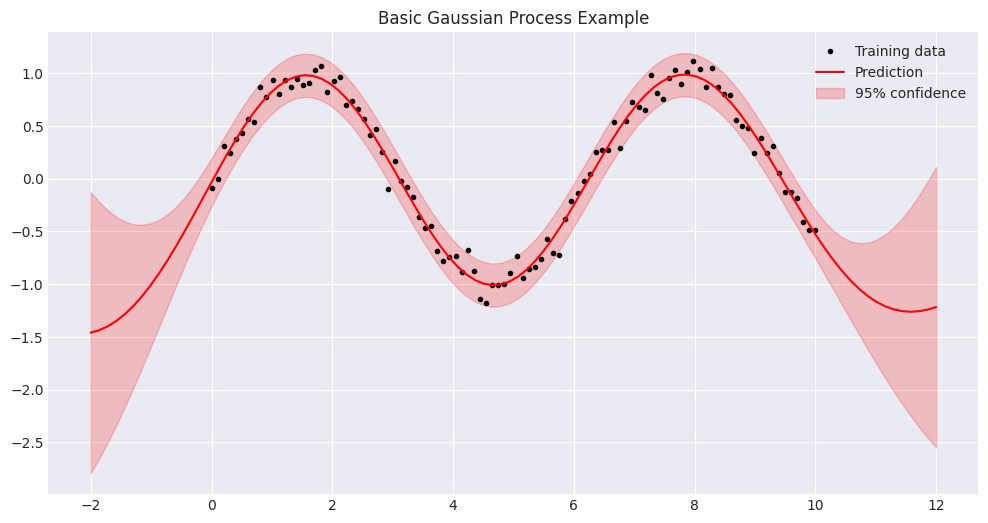

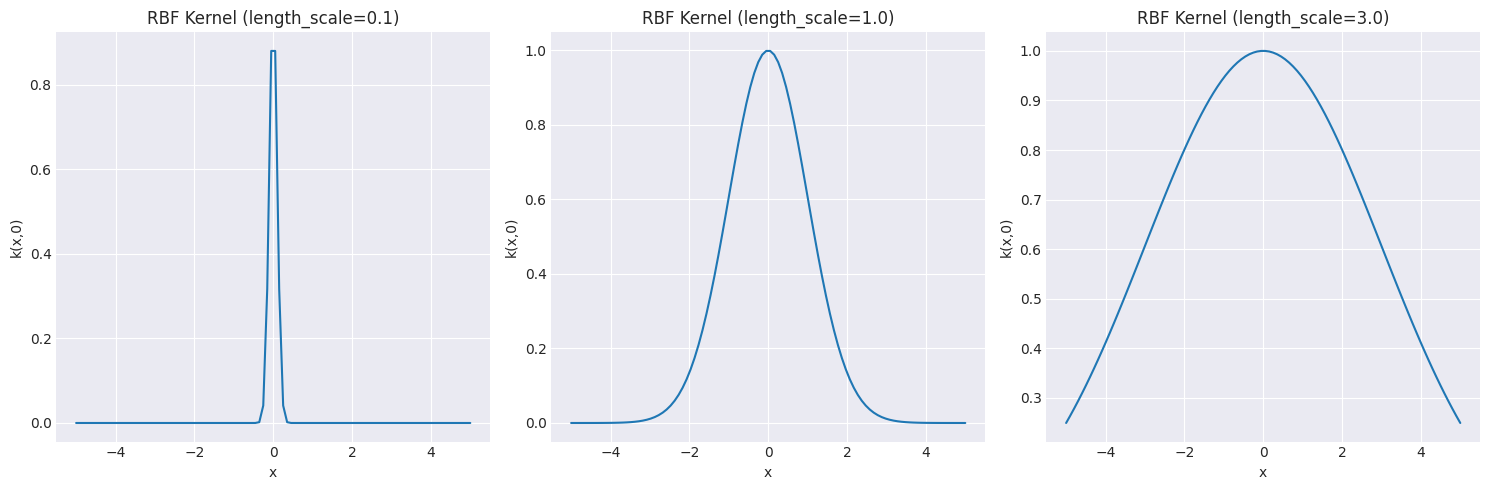

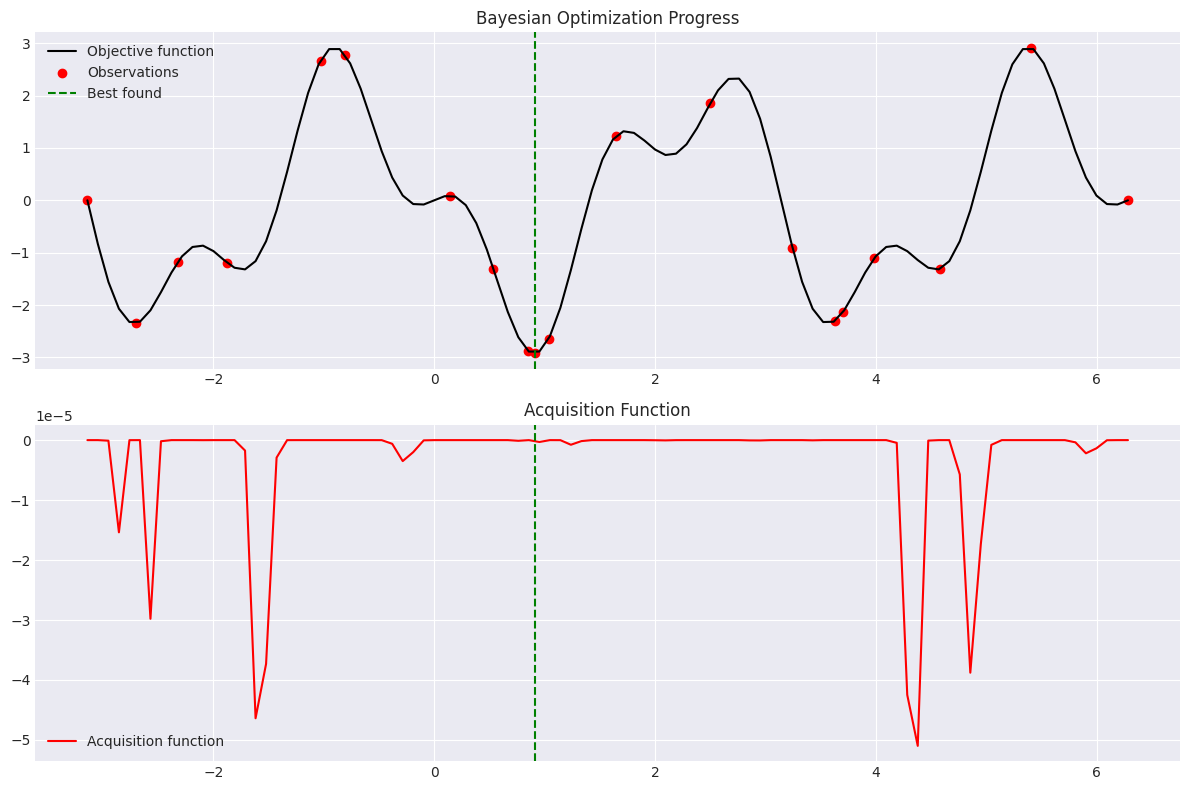

Optimal value found: -2.923 at x = 0.916


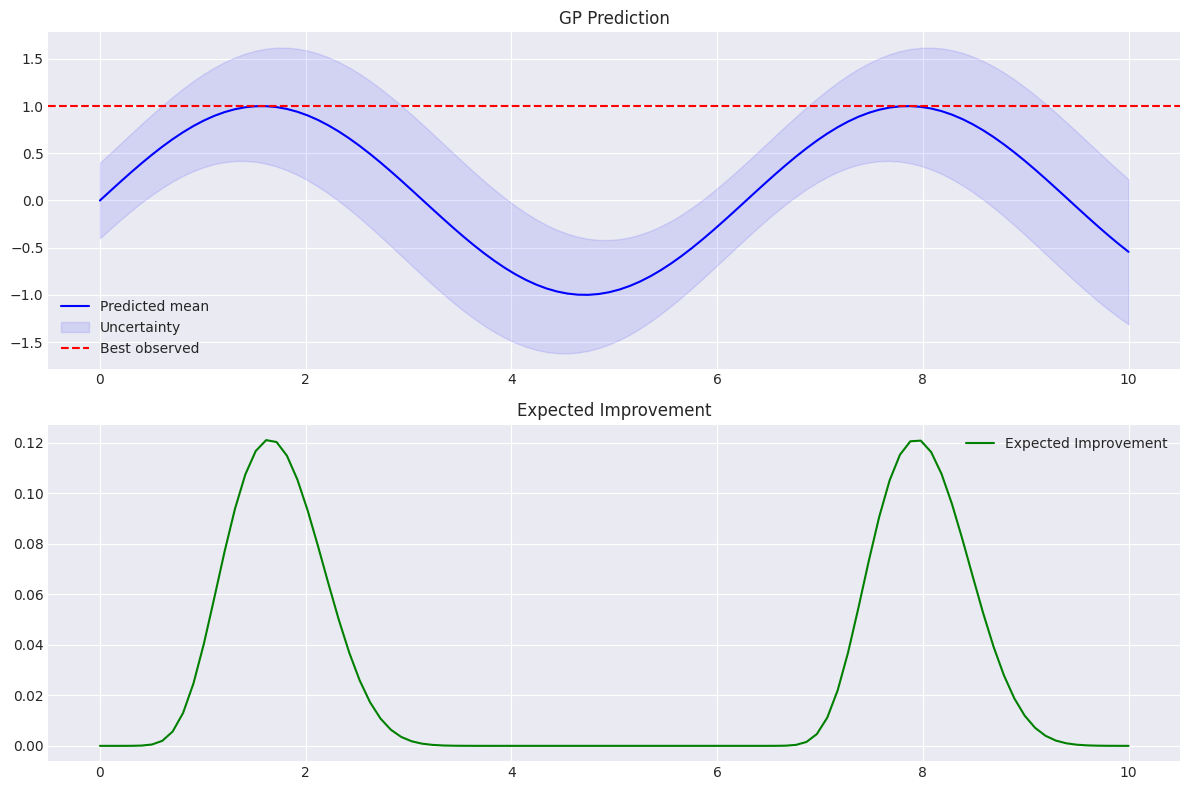

In [24]:
print("Running demonstrations...")
demonstrate_gp_basics()
visualize_rbf_kernel()
demonstrate_bayesian_optimization()
visualize_expected_improvement()